In [ ]:
import pyodbc
import pandas as pd

In [ ]:
server = 'LAPTOP-G6PS8U02\SQLEXPRESS'
database = 'Abhishekdb'
#username = 'your_username'
#password = 'your_password'
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database)
#cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)


In [ ]:
# Define your SQL query
query = 'SELECT * FROM employe'

# Use pandas to retrieve data into a DataFrame
df = pd.read_sql(query, cnxn)

# Close the database connection
cnxn.close()

# View the data in the Jupyter Notebook
df.head()

In [ ]:
import pyodbc
import pandas as pd

# Connect to the SQL Server database using pyodbc
server = 'LAPTOP-G6PS8U02\SQLEXPRESS'
database = 'Abhishekdb'
#username = 'your_username'
#password = 'your_password'
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database)
#cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

# Define the path to your CSV file
csv_file = r'C:\Users\Abhishek Padir\Desktop\Data_26_01\Data_26_01_Combined - Copy - Copy.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file)
df




In [ ]:

# Check the data type of all columns
print(df.dtypes)

In [ ]:
# Define the name of the new table you want to create in the SQL Server database
table_name = 'Singaldatadb'



In [ ]:

schema = """ CREATE TABLE {table_name} (
        Timestamp              object, 
        Latitude              float64,
        Longitude             float64,
        RSRP_51               float64,
        RSRP_52               float64,
        RSRP_54               float64,
        Signal Strength 51     object,
        Signal Strength 52     object,
        Signal Strength 54     object
        )
        """.format(table_name=table_name)

# Execute the schema query to create the new table
cursor = cnxn.cursor()
cursor.execute(schema)
cursor.commit()

# Read the CSV file into a pandas DataFrame
csv_path = r'C:\Users\Abhishek Padir\Desktop\Data_26_01\Data_26_01_Combined - Copy - Copy.csv'
df = pd.read_csv(csv_path)

# Insert the data from the DataFrame into the new table
for index, row in df.iterrows():
    values = tuple(row)
    query = "INSERT INTO {Singaldatadb} VALUES {values}".format(table_name=table_name, values=values)
    cursor.execute(query)
cursor.commit()

# Close the database connection
cnxn.close()

In [ ]:
import pyodbc
import pandas as pd

# Connect to the SQL Server database using pyodbc
server = 'LAPTOP-G6PS8U02\SQLEXPRESS'
database = 'Abhishekdb'
#username = 'your_username'
#password = 'your_password'
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database)
#cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

# Define the schema of the new table
table_name = 'Signaldb'
schema = """
    CREATE TABLE {table_name} (
        Timestamp             varchar(50),
        Latitude              float64,
        Longitude             float64,
        RSRP_51               float64,
        RSRP_52               float64,
        RSRP_54               float64,
        Signal_Strength_51    varchar(50),
        Signal_Strength_52    varchar(50),
        Signal_Strength_54    varchar(50)
    )
""".format(table_name=table_name)

# Execute the schema query to create the new table
cursor = cnxn.cursor()
cursor.execute(schema)
cursor.commit()

# Read the CSV file into a pandas DataFrame
csv_path = r'C:\Users\Abhishek Padir\Desktop\Data_26_01\Data_26_01_Combined - Copy - Copy.csv'
df = pd.read_csv(csv_path)

# Insert the data from the DataFrame into the new table
for index, row in df.iterrows():
    values = tuple(row)
    query = "INSERT INTO {table_name} VALUES {values}".format(table_name=table_name, values=values)
    cursor.execute(query)
cursor.commit()

# Close the database connection
cnxn.close()


In [ ]:
import speedtest
import time
import pyodbc
import matplotlib.pyplot as plt

def perform_speed_tests(duration=10):
    st = speedtest.Speedtest()
    
    print("Getting list of servers...")
    st.get_servers()
    
    timestamps = []
    download_speeds = []
    
    for _ in range(duration):
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
        
        server = st.get_best_server()
        server_name = server['host']
        print(f"\nTimestamp: {timestamp}")
        print(f"Server: {server_name}")
        
        print("Performing download speed test...")
        download_speed = st.download() / 1024 / 1024  # Convert to Mbps
        print(f"Download Speed: {download_speed:.2f} Mbps")
        
        timestamps.append(timestamp)
        download_speeds.append(download_speed)
        
        time.sleep(1)  # Wait for 1 second before the next test
        
    print("\nData collection complete!")

    # Create a connection to the SQL Server database
    server = 'LAPTOP-G6PS8U02\SQLEXPRESS'
    database = 'Abhishekdb'
    cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database)
    
    # Create a cursor to execute SQL commands
    cursor = cnxn.cursor()
    
    # Create a table for speed test data if it doesn't exist
    cursor.execute('''
        IF NOT EXISTS (SELECT * FROM sys.objects WHERE object_id = OBJECT_ID(N'[dbo].[SpeedTestResults3]') AND type in (N'U'))
        CREATE TABLE [dbo].[SpeedTestResults3] (
            [ID] INT IDENTITY(1,1) PRIMARY KEY,
            [Timestamp] DATETIME,
            [ServerName] NVARCHAR(255),
            [DownloadSpeed] FLOAT
        )
    ''')
    
    # Insert speed test data into the table
    for i in range(len(timestamps)):
        query = f'''
            INSERT INTO [dbo].[SpeedTestResults3] ([Timestamp], [ServerName], [DownloadSpeed])
            VALUES ('{timestamps[i]}', '{server_name}', {download_speeds[i]})
        '''
        cursor.execute(query)
        cnxn.commit()
    
    cursor.close()
    cnxn.close()
    
    # Create a line chart to compare download speed values
    plt.plot(timestamps, download_speeds, marker='o')
    plt.xlabel('Timestamp')
    plt.ylabel('Download Speed (Mbps)')
    plt.title('Download Speed Over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    perform_speed_tests(duration=10)


In [ ]:
import speedtest
import time
import pyodbc
import matplotlib.pyplot as plt

def perform_speed_tests(duration=10):
    st = speedtest.Speedtest()
    
    print("Getting list of servers...")
    st.get_servers()
    
    timestamps = []
    download_speeds = []
    upload_speeds = []  # Add this list for upload speeds
    
    for _ in range(duration):
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
        
        server = st.get_best_server()
        server_name = server['host']
        print(f"\nTimestamp: {timestamp}")
        print(f"Server: {server_name}")
        
        print("Performing download speed test...")
        download_speed = st.download() / 1024 / 1024  # Convert to Mbps
        print(f"Download Speed: {download_speed:.2f} Mbps")
        
        print("Performing upload speed test...")  # Perform upload speed test
        upload_speed = st.upload() / 1024 / 1024  # Convert to Mbps
        print(f"Upload Speed: {upload_speed:.2f} Mbps")
        
        timestamps.append(timestamp)
        download_speeds.append(download_speed)
        upload_speeds.append(upload_speed)
        
        time.sleep(1)  # Wait for 1 second before the next test
        
    print("\nData collection complete!")

    # Create a connection to the SQL Server database
    server = 'LAPTOP-G6PS8U02\SQLEXPRESS'
    database = 'Abhishekdb'
    cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database)
    
    # Create a cursor to execute SQL commands
    cursor = cnxn.cursor()
    
    # Create a table for speed test data if it doesn't exist
    cursor.execute('''
        IF NOT EXISTS (SELECT * FROM sys.objects WHERE object_id = OBJECT_ID(N'[dbo].[SpeedTestResults2]') AND type in (N'U'))
        CREATE TABLE [dbo].[SpeedTestResults2] (
            [ID] INT IDENTITY(1,1) PRIMARY KEY,
            [Timestamp] DATETIME,
            [ServerName] NVARCHAR(255),
            [DownloadSpeed] FLOAT,
            [UploadSpeed] FLOAT  -- Add UploadSpeed column
        )
    ''')
    
    # Insert speed test data into the table
    for i in range(len(timestamps)):
        query = f'''
            INSERT INTO [dbo].[SpeedTestResults2] ([Timestamp], [ServerName], [DownloadSpeed], [UploadSpeed])
            VALUES ('{timestamps[i]}', '{server_name}', {download_speeds[i]}, {upload_speeds[i]})
        '''
        cursor.execute(query)
        cnxn.commit()
    
    cursor.close()
    cnxn.close()
    
    # Create a line chart to compare download speed values
    plt.plot(timestamps, download_speeds, marker='o', label='Download Speed')
    plt.plot(timestamps, upload_speeds, marker='o', label='Upload Speed')  # Add upload speeds to the chart
    plt.xlabel('Timestamp')
    plt.ylabel('Speed (Mbps)')
    plt.title('Download and Upload Speed Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    perform_speed_tests(duration=10)


In [ ]:
import speedtest
import time
import pyodbc
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def get_rsrp():
    # Replace this with code to fetch RSRP data from your cellular modem or network interface
    # Example: rsrp = my_modem.get_rsrp()
    return 0  # Replace 0 with the actual RSRP value

def get_rsrq():
    # Replace this with code to fetch RSRQ data from your cellular modem or network interface
    # Example: rsrq = my_modem.get_rsrq()
    return 0  # Replace 0 with the actual RSRQ value

def update_plot(i, timestamps, download_speeds, rsrp_values, rsrq_values, ax):
    ax.clear()
    ax.plot(timestamps, download_speeds, marker='o', label='Download Speed')
    ax.plot(timestamps, rsrp_values, marker='o', label='RSRP')
    ax.plot(timestamps, rsrq_values, marker='o', label='RSRQ')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Values')
    ax.set_title('Dynamic Speed Test Data')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

def perform_speed_tests(duration=10):
    st = speedtest.Speedtest()
    
    print("Getting list of servers...")
    st.get_servers()
    
    timestamps = []
    download_speeds = []
    rsrp_values = []
    rsrq_values = []
    
    fig, ax = plt.subplots()
    
    ani = FuncAnimation(fig, update_plot, fargs=(timestamps, download_speeds, rsrp_values, rsrq_values, ax),
                        interval=1000)  # Update plot every 1 second
    
    for _ in range(duration):
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
        
        server = st.get_best_server()
        server_name = server['host']
        
        print(f"\nTimestamp: {timestamp}")
        print(f"Server: {server_name}")
        
        print("Performing download speed test...")
        download_speed = st.download() / 1024 / 1024  # Convert to Mbps
        print(f"Download Speed: {download_speed:.2f} Mbps")
        
        rsrp = get_rsrp()  # Fetch RSRP data
        rsrq = get_rsrq()  # Fetch RSRQ data
        
        timestamps.append(timestamp)
        download_speeds.append(download_speed)
        rsrp_values.append(rsrp)
        rsrq_values.append(rsrq)
        
        time.sleep(1)  # Wait for 1 second before the next test
        
    print("\nData collection complete!")

    plt.show()

if __name__ == "__main__":
    perform_speed_tests(duration=10)


In [ ]:
import speedtest
import time
import pyodbc
import matplotlib.pyplot as plt

# Server information
servers = [
    {
        "id": 1,
        "name": "Libre Speed 5G KL",
        "server": "http://192.168.83.213/backend",
        "dlURL": "garbage.php",
        "ulURL": "empty.php",
        "pingURL": "empty.php",
        "getIpURL": "getIP.php"
    },
    {
        "id": 2,
        "name": "Libre Speed 5G KL2",
        "server": "http://192.168.83.186/backend",
        "dlURL": "garbage.php",
        "ulURL": "empty.php",
        "pingURL": "empty.php",
        "getIpURL": "getIP.php"
    }
]

def perform_speed_tests(duration=10):
    timestamps = []
    download_speeds = []
    
    for _ in range(duration):
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
        
        for server in servers:
            print(f"\nTimestamp: {timestamp}")
            print(f"Server: {server['name']}")
            
            st = speedtest.Speedtest()
            st.download_url = f"{server['server']}/{server['dlURL']}"
            
            print("Performing download speed test...")
            download_speed = st.download() / 1024 / 1024  # Convert to Mbps
            print(f"Download Speed: {download_speed:.2f} Mbps")
            
            timestamps.append(timestamp)
            download_speeds.append(download_speed)
            
            time.sleep(1)  # Wait for 1 second before the next test
    
    print("\nData collection complete!")

    # Create a connection to the SQL Server database
    server = 'LAPTOP-G6PS8U02\SQLEXPRESS'
    database = 'Abhishekdb'
    cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database)
    
    # Create a cursor to execute SQL commands
    cursor = cnxn.cursor()
    
    # Create a table for speed test data if it doesn't exist
    cursor.execute('''
        IF NOT EXISTS (SELECT * FROM sys.objects WHERE object_id = OBJECT_ID(N'[dbo].[SpeedTestResults3]') AND type in (N'U'))
        CREATE TABLE [dbo].[SpeedTestResults3] (
            [ID] INT IDENTITY(1,1) PRIMARY KEY,
            [Timestamp] DATETIME,
            [ServerName] NVARCHAR(255),
            [DownloadSpeed] FLOAT
        )
    ''')
    
    # Insert speed test data into the table
    for i in range(len(timestamps)):
        query = f'''
            INSERT INTO [dbo].[SpeedTestResults3] ([Timestamp], [ServerName], [DownloadSpeed])
            VALUES ('{timestamps[i]}', '{servers[i % len(servers)]["name"]}', {download_speeds[i]})
        '''
        cursor.execute(query)
        cnxn.commit()
    
    cursor.close()
    cnxn.close()
    
    # Create a line chart to compare download speed values
    plt.plot(timestamps, download_speeds, marker='o')
    plt.xlabel('Timestamp')
    plt.ylabel('Download Speed (Mbps)')
    plt.title('Download Speed Over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    perform_speed_tests(duration=10)


In [ ]:
import speedtest
import time
import pyodbc
import matplotlib.pyplot as plt

# Server information
servers = [
    {
        "id": 1,
        "name": "Libre Speed 5G KL",
        "server": "http://192.168.83.213/backend",
        "dlURL": "garbage.php",
        "ulURL": "empty.php",
        "pingURL": "empty.php",
        "getIpURL": "getIP.php"
    },
    {
        "id": 2,
        "name": "Libre Speed 5G KL2",
        "server": "http://192.168.83.186/backend",
        "dlURL": "garbage.php",
        "ulURL": "empty.php",
        "pingURL": "empty.php",
        "getIpURL": "getIP.php"
    }
]

def plot_speed_metrics(timestamps, values, metric_name):
    plt.plot(timestamps, values, marker='o', label=metric_name)
    plt.xlabel('Timestamp')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

def perform_speed_tests(duration=10):
    timestamps = []
    download_speeds = []
    upload_speeds = []
    pings = []
    
    for _ in range(duration):
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
        
        for server in servers:
            st = speedtest.Speedtest()
            st.download_url = f"{server['server']}/{server['dlURL']}"
            st.upload_url = f"{server['server']}/{server['ulURL']}"
            st.ping_url = f"{server['server']}/{server['pingURL']}"
            st.get_ip_url = f"{server['server']}/{server['getIpURL']}"
            
            st.get_best_server()

            download_speed = st.download() / 1024 / 1024  # Convert to Mbps
            upload_speed = st.upload() / 1024 / 1024  # Convert to Mbps
            ping = st.results.ping
            
            timestamps.append(timestamp)
            download_speeds.append(download_speed)
            upload_speeds.append(upload_speed)
            pings.append(ping)

            time.sleep(1)  # Wait for 1 second before the next test
    
    print("\nData collection complete!")

    # Create a connection to the SQL Server database
    server = 'LAPTOP-G6PS8U02\SQLEXPRESS'
    database = 'Abhishekdb'
    cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database)
    
    # ... Database related code ...

    # Create charts for each metric
    plot_speed_metrics(timestamps, download_speeds, 'Download Speed (Mbps)')
    plt.show()

    plot_speed_metrics(timestamps, upload_speeds, 'Upload Speed (Mbps)')
    plt.show()

    plot_speed_metrics(timestamps, pings, 'Ping (ms)')
    plt.show()

    # Create dynamic comparison chart
    plt.plot(timestamps, download_speeds, marker='o', label='Download Speed')
    plt.plot(timestamps, upload_speeds, marker='x', label='Upload Speed')
    plt.plot(timestamps, pings, marker='s', label='Ping')
    plt.xlabel('Timestamp')
    plt.ylabel('Metrics')
    plt.title('Speed and Ping Comparison Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    perform_speed_tests(duration=10)


In [ ]:
import speedtest
import time
import pyodbc
import matplotlib.pyplot as plt

# Server information
servers = [
    {
        "id": 1,
        "name": "Libre Speed 5G KL",
        "server": "http://192.168.83.213/backend",
        "dlURL": "garbage.php",
        "ulURL": "empty.php",
        "pingURL": "empty.php",
        "getIpURL": "getIP.php"
    },
    {
        "id": 2,
        "name": "Libre Speed 5G KL2",
        "server": "http://192.168.83.186/backend",
        "dlURL": "garbage.php",
        "ulURL": "empty.php",
        "pingURL": "empty.php",
        "getIpURL": "getIP.php"
    }
]

def plot_speed_metrics(timestamps, values, metric_name):
    plt.plot(timestamps, values, marker='o', label=metric_name)
    plt.xlabel('Timestamp')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

def perform_speed_tests(duration=10):
    timestamps = []
    download_speeds = []
    upload_speeds = []
    pings = []
    
    for _ in range(duration):
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
        
        for server in servers:
            st = speedtest.Speedtest()
            st.download_url = f"{server['server']}/{server['dlURL']}"
            st.upload_url = f"{server['server']}/{server['ulURL']}"
            st.ping_url = f"{server['server']}/{server['pingURL']}"
            st.get_ip_url = f"{server['server']}/{server['getIpURL']}"
            
            st.get_best_server()

            download_speed = st.download() / 1024 / 1024  # Convert to Mbps
            upload_speed = st.upload() / 1024 / 1024  # Convert to Mbps
            ping = st.results.ping
            
            timestamps.append(timestamp)
            download_speeds.append(download_speed)
            upload_speeds.append(upload_speed)
            pings.append(ping)

            time.sleep(1)  # Wait for 1 second before the next test
    
    print("\nData collection complete!")

    # Create a connection to the SQL Server database
    server = 'LAPTOP-G6PS8U02\SQLEXPRESS'
    database = 'Abhishekdb'
    cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database)
    
    # Create a cursor to execute SQL commands
    cursor = cnxn.cursor()
    
    # Create a table for speed test data if it doesn't exist
    cursor.execute('''
        IF NOT EXISTS (SELECT * FROM sys.objects WHERE object_id = OBJECT_ID(N'[dbo].[SpeedTestResults]') AND type in (N'U'))
        CREATE TABLE [dbo].[SpeedTestResults] (
            [ID] INT IDENTITY(1,1) PRIMARY KEY,
            [Timestamp] DATETIME,
            [ServerName] NVARCHAR(255),
            [DownloadSpeed] FLOAT,
            [UploadSpeed] FLOAT,
            [Ping] INT
        )
    ''')
    
    # Insert speed test data into the table
    for i in range(len(timestamps)):
        query = f'''
            INSERT INTO [dbo].[SpeedTestResults] ([Timestamp], [ServerName], [DownloadSpeed], [UploadSpeed], [Ping])
            VALUES ('{timestamps[i]}', '{servers[i % len(servers)]["name"]}', 
                    {download_speeds[i]}, {upload_speeds[i]}, {pings[i]})
        '''
        cursor.execute(query)
        cnxn.commit()
    
    cursor.close()
    cnxn.close()
    
    # Display speed test results
    print("\nSpeed Test Results:")
    for i, server in enumerate(servers):
        print(f"\nServer: {server['name']}")
        print(f"Timestamp\tDownload Speed (Mbps)\tUpload Speed (Mbps)\tPing (ms)")
        for j in range(i, len(timestamps), len(servers)):
            print(f"{timestamps[j]}\t{download_speeds[j]:.2f}\t\t\t{upload_speeds[j]:.2f}\t\t\t{pings[j]}")

    # Create charts for each metric
    plot_speed_metrics(timestamps, download_speeds, 'Download Speed (Mbps)')
    plt.show()

    plot_speed_metrics(timestamps, upload_speeds, 'Upload Speed (Mbps)')
    plt.show()

    plot_speed_metrics(timestamps, pings, 'Ping (ms)')
    plt.show()

    # Create dynamic comparison chart
    plt.plot(timestamps, download_speeds, marker='o', label='Download Speed')
    plt.plot(timestamps, upload_speeds, marker='x', label='Upload Speed')
    plt.plot(timestamps, pings, marker='s', label='Ping')
    plt.xlabel('Timestamp')
    plt.ylabel('Metrics')
    plt.title('Speed and Ping Comparison Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    perform_speed_tests(duration=10)



Timestamp: 2023-08-10 14:31:20
Server: Libre Speed 5G KL
Server URL: http://192.168.83.213/backend
Performing speed tests...
Download Speed: 12.77 Mbps
Upload Speed: 42.44 Mbps
Ping: 23.613 ms

Timestamp: 2023-08-10 14:31:20
Server: Libre Speed 5G KL2
Server URL: http://192.168.83.186/backend
Performing speed tests...
Download Speed: 18.12 Mbps
Upload Speed: 82.27 Mbps
Ping: 41.227 ms

Timestamp: 2023-08-10 14:32:10
Server: Libre Speed 5G KL
Server URL: http://192.168.83.213/backend
Performing speed tests...
Download Speed: 16.78 Mbps
Upload Speed: 63.35 Mbps
Ping: 51.979 ms

Timestamp: 2023-08-10 14:32:10
Server: Libre Speed 5G KL2
Server URL: http://192.168.83.186/backend
Performing speed tests...
Download Speed: 20.12 Mbps
Upload Speed: 64.24 Mbps
Ping: 58.117 ms

Timestamp: 2023-08-10 14:33:00
Server: Libre Speed 5G KL
Server URL: http://192.168.83.213/backend
Performing speed tests...
Download Speed: 22.90 Mbps
Upload Speed: 63.02 Mbps
Ping: 44.495 ms

Timestamp: 2023-08-10 14:33

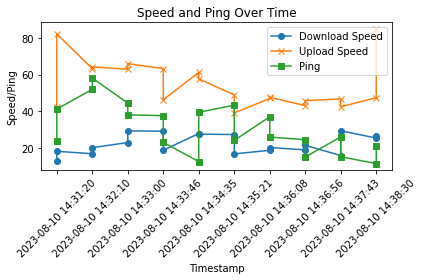

In [4]:
import speedtest
import time
import pyodbc
import matplotlib.pyplot as plt

# Server information
servers = [
    {
        "id": 1,
        "name": "Libre Speed 5G KL",
        "server": "http://192.168.83.213/backend",
        "dlURL": "garbage.php",
        "ulURL": "empty.php",
        "pingURL": "empty.php",
        "getIpURL": "getIP.php"
    },
    {
        "id": 2,
        "name": "Libre Speed 5G KL2",
        "server": "http://192.168.83.186/backend",
        "dlURL": "garbage.php",
        "ulURL": "empty.php",
        "pingURL": "empty.php",
        "getIpURL": "getIP.php"
    }
]

def perform_speed_tests(duration=1000):
    timestamps = []
    download_speeds = []
    upload_speeds = []
    pings = []
    
    for _ in range(duration):
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
        
        for server in servers:
            print(f"\nTimestamp: {timestamp}")
            print(f"Server: {server['name']}")
            print(f"Server URL: {server['server']}")
            
            st = speedtest.Speedtest()
            st.download_url = f"{server['server']}/{server['dlURL']}"
            st.upload_url = f"{server['server']}/{server['ulURL']}"
            st.ping_url = f"{server['server']}/{server['pingURL']}"
            st.get_ip_url = f"{server['server']}/{server['getIpURL']}"
            
            print("Performing speed tests...")
            st.get_best_server()

            download_speed = st.download() / 1024 / 1024  # Convert to Mbps
            upload_speed = st.upload() / 1024 / 1024  # Convert to Mbps
            ping = st.results.ping

            print(f"Download Speed: {download_speed:.2f} Mbps")
            print(f"Upload Speed: {upload_speed:.2f} Mbps")
            print(f"Ping: {ping} ms")
            
            timestamps.append(timestamp)
            download_speeds.append(download_speed)
            upload_speeds.append(upload_speed)
            pings.append(ping)

            time.sleep(1)  # Wait for 1 second before the next test
    
    print("\nData collection complete!")

    # Create a connection to the SQL Server database
    server = 'LAPTOP-G6PS8U02\SQLEXPRESS'
    database = 'Abhishekdb'
    cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database)
    
    # Create a cursor to execute SQL commands
    cursor = cnxn.cursor()
    
    # Create a table for speed test data if it doesn't exist
    cursor.execute('''
        IF NOT EXISTS (SELECT * FROM sys.objects WHERE object_id = OBJECT_ID(N'[dbo].[SpeedTestResults6]') AND type in (N'U'))
        CREATE TABLE [dbo].[SpeedTestResults6] (
            [ID] INT IDENTITY(1,1) PRIMARY KEY,
            [Timestamp] DATETIME,
            [ServerName] NVARCHAR(255),
            [ServerURL] NVARCHAR(255),
            [DownloadSpeed] FLOAT,
            [UploadSpeed] FLOAT,
            [Ping] INT
        )
    ''')
    
    # Insert speed test data into the table
    for i in range(len(timestamps)):
        query = f'''
            INSERT INTO [dbo].[SpeedTestResults6] ([Timestamp], [ServerName], [ServerURL], [DownloadSpeed], [UploadSpeed], [Ping])
            VALUES ('{timestamps[i]}', '{servers[i % len(servers)]["name"]}', '{servers[i % len(servers)]["server"]}', 
                    {download_speeds[i]}, {upload_speeds[i]}, {pings[i]})
        '''
        cursor.execute(query)
        cnxn.commit()
    
    cursor.close()
    cnxn.close()
    
    # Create a line chart to compare download speed values
    plt.plot(timestamps, download_speeds, marker='o', label='Download Speed')
    plt.plot(timestamps, upload_speeds, marker='x', label='Upload Speed')
    plt.plot(timestamps, pings, marker='s', label='Ping')
    plt.xlabel('Timestamp')
    plt.ylabel('Speed/Ping')
    plt.title('Speed and Ping Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    perform_speed_tests(duration=10)
